In [1]:
!pip install pytz

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import time
import gc
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
tr_s = 300000
te_s = 100000
nrows=None
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        'click_id'      : 'uint32'
        }

In [42]:
tr = pd.read_csv('../input/train.csv', dtype=dtypes,
                       usecols=['ip', 'is_attributed', 'click_time'], nrows=nrows).sample(tr_s)

In [20]:
gc.collect()

9678

In [21]:
te = pd.read_csv('../input/test_supplement.csv', dtype=dtypes,
                      usecols=['ip', 'click_time'],
                     nrows=nrows).sample(te_s)
all_df = tr.append(te)
gc.collect()

37

In [22]:
cst = pytz.timezone('Asia/Shanghai')
all_df['click_time'] = pd.to_datetime(all_df['click_time']).dt.tz_localize(pytz.utc).dt.tz_convert(cst)
all_df['day'] = all_df.click_time.dt.day.astype('uint8')

all_df['day7'] = all_df.day == 7 # 1'st day
all_df['day8'] = all_df.day == 8 # 2'nd day
all_df['day9'] = all_df.day == 9 # 3'rd day
all_df['day_test'] = all_df.day == 10 # 4'th day(test)

In [23]:
def print_count(df, tgt):
    df = df[['ip', tgt]].groupby('ip')[tgt].sum().to_frame().reset_index()
    df[tgt+'_count'] = df[tgt].rolling(window=1000).mean()
    plt.plot(df.ip, df[tgt+'_count'])

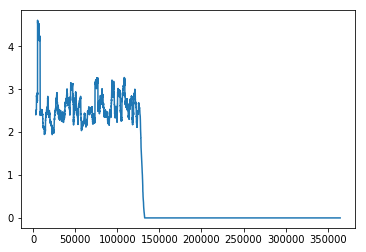

In [24]:
print_count(all_df,'day_test')

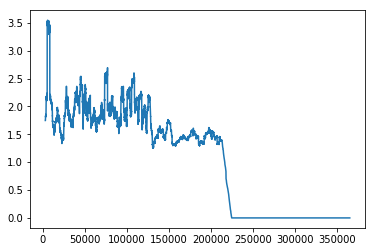

In [25]:
print_count(all_df,'day7')

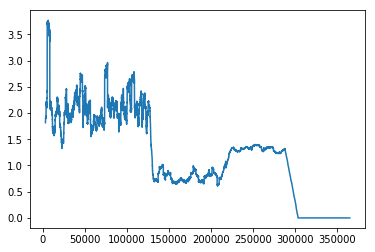

In [26]:
print_count(all_df,'day8')

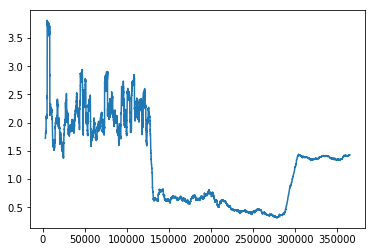

In [27]:
print_count(all_df,'day9')

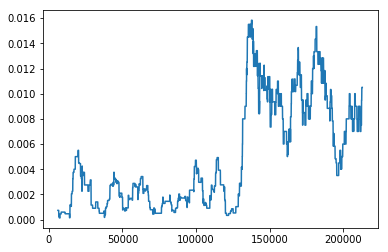

In [28]:
def print_attr(df):
    df = df[['ip', 'is_attributed']].groupby('ip').is_attributed.mean().to_frame().reset_index()
    df['roll'] = df.is_attributed.rolling(window=1000).mean()
    plt.plot(df.ip, df.roll)

print_attr(all_df[all_df.day == 7])

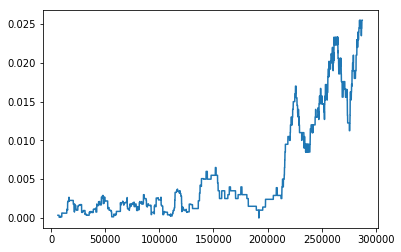

In [29]:
print_attr(all_df[all_df.day == 8])

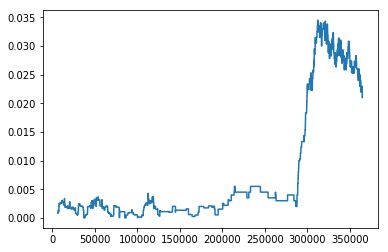

In [30]:
print_attr(all_df[all_df.day == 9])

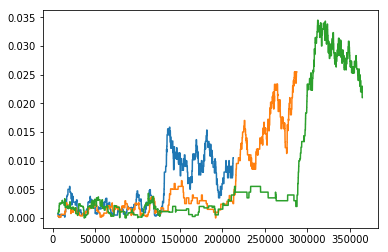

In [31]:
print_attr(all_df[all_df.day == 7])
print_attr(all_df[all_df.day == 8])
print_attr(all_df[all_df.day == 9])

In [36]:
all_df.groupby(['ip'])['day'].nunique().reset_index().rename(index=str, columns={'day': 'ip_day_unique'})

,ip,ip_day_unique
0,1,1
1,5,1
2,6,2
3,9,4
4,10,2
5,19,1
6,20,4
7,25,2
8,27,4
9,29,1


In [45]:
df = tr.groupby('ip').is_attributed.mean().to_frame().reset_index()

df.head()

,ip,is_attributed
0,6,0.0
1,9,0.0
2,10,0.0
3,19,0.0
4,20,0.0


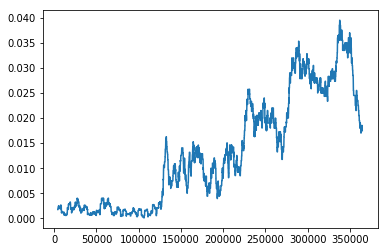

In [46]:
df['roll'] = df.is_attributed.rolling(window=1000).mean()
plt.plot(np.log2(df.ip), df.roll)

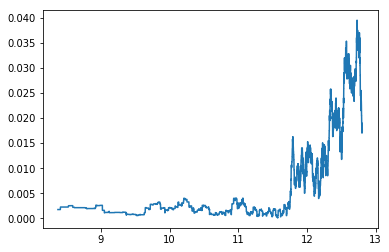

In [48]:
df['roll'] = df.is_attributed.rolling(window=1000).mean()
plt.plot(np.log(df.ip), df.roll)

In [49]:
all_df['click_hour']=all_df['click_time'].dt.hour

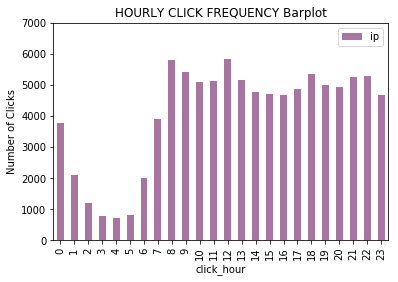

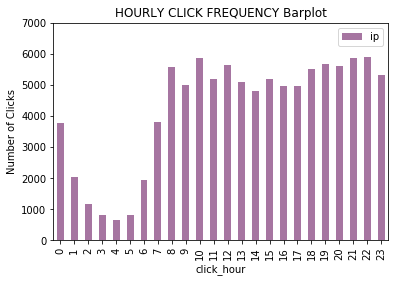

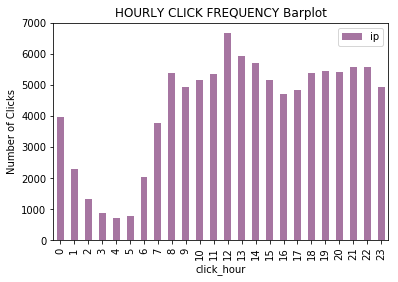

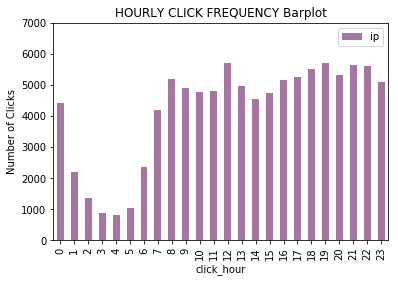

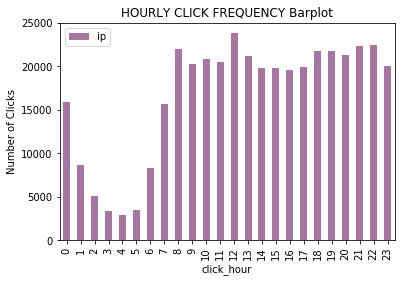

In [72]:
day_7 = all_df[all_df.day == 7]
day_7[['click_hour', 'ip']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Barplot');
plt.ylabel('Number of Clicks');
plt.ylim([0,7000])

day_8 = all_df[all_df.day == 8]
day_8[['click_hour', 'ip']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Barplot');
plt.ylabel('Number of Clicks');
plt.ylim([0,7000])

day_9 = all_df[all_df.day == 9]
day_9[['click_hour', 'ip']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Barplot');
plt.ylabel('Number of Clicks');
plt.ylim([0,7000])

day_10 = all_df[all_df.day == 10]
day_10[['click_hour', 'ip']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Barplot');
plt.ylabel('Number of Clicks');
plt.ylim([0,7000])

all_df[['click_hour', 'ip']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Barplot');
plt.ylabel('Number of Clicks');